In [13]:
import os

os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [14]:
import jax
import jax.numpy as jnp

import matplotlib.pyplot as plt

In [15]:

path = "/pscratch/sd/i/imendoza/data/cache_chains/results_benchmark-v2_72_10_43.npy" # 10 chains, 42 seed

d = jnp.load(path, allow_pickle=True)[()]

In [16]:
d['warmup_run_time'], d['inference_run_time']

(5.895392179489136, 0.5042557716369629)

In [17]:
samples = d['states'].position
samples['f'].shape

(10, 100)

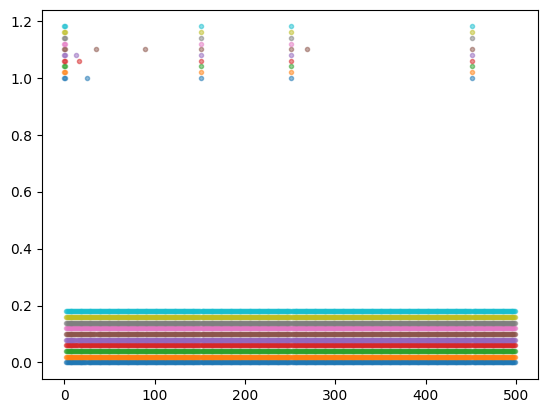

In [18]:
divs = d['adapt_info'].info.is_divergent
for ii in range(10):
    plt.plot(divs[ii, :]+ii*0.02, 'o', ms=3, alpha=0.5)
    # plt.plot(step_sizes[1, :], 'o')
    # plt.plot(step_sizes[8, :], 'o')

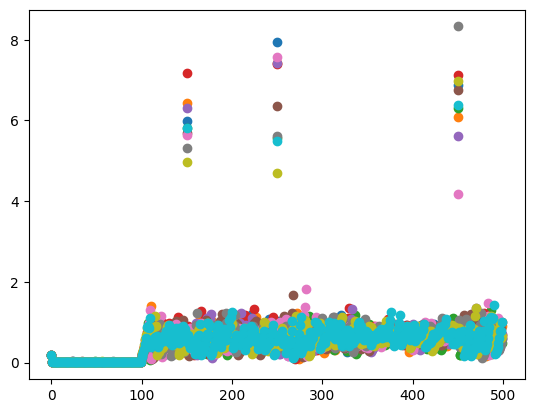

In [19]:
step_sizes = d['adapt_info'].adaptation_state.step_size
for ii in range(10):
    plt.plot(step_sizes[ii, :], 'o')
    # plt.plot(step_sizes[1, :], 'o')
    # plt.plot(step_sizes[8, :], 'o')

In [20]:
jnp.argwhere(divs[1, :])

Array([[  0],
       [  1],
       [151],
       [251],
       [451]], dtype=int32)

In [21]:
d['tuned_params']['step_size'][:]

Array([0.5973125 , 0.54071325, 0.6056958 , 0.66169524, 0.64512   ,
       0.66753644, 0.55601484, 0.5413814 , 0.650687  , 0.57242376],      dtype=float32, weak_type=True)

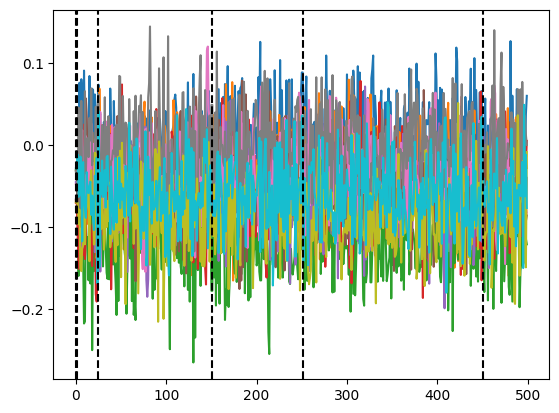

In [24]:
for ii in range(10):
    plt.plot(d['adapt_info'].state.position['g1'][ii, :])
# plt.axhline(0.7)
# plt.axhline(-0.7)

for ii in range(500):
    if divs[0,ii]:
        plt.axvline(ii, color='k', linestyle='--')